<nav>
<a href="https://www.linkedin.com/in/jeshua-cespedes/">LinkedIn</a> |
<a href="https://github.com/jeshuacn">Github</a> |
</nav>

# Case Study: Cyclistic Bike Sharing

# **Summary**


## Scenario

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members.

## About Divvy
Divvy is Chicagoland’s bike share system across Chicago and Evanston. Divvy provides residents and visitors with a convenient, fun and affordable transportation option for getting around and exploring Chicago.

## Business Task:

Analyze and identify Divvy's bikes use between annual members and casual riders for marketing strategy. (How casual riders differ from annual members?)


**Note:** any rider type different from member is considered casual

## The Data

The data is located on an AWS server where it is easily downloadable. It is organized by year and Fiscal Quarters.

In the following link you'll find Divvy's Historical trip data available for public use: [Public data](https://ride.divvybikes.com/system-data)

<ins>Each trip is anonymized and includes:</ins>

-Trip start day and time

-Trip end day and time

-Trip start station

-Trip end station

-Rider type (Member, Single Ride, and Day Pass)

The data has been processed to remove trips taken by staff as they service and inspect the system; and any trips below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

**Note:** This data is provided according to the [Divvy Data License Agreement](https://ride.divvybikes.com/data-license-agreement) and released monthly.

# Data Preparation

In [1]:
# Importing useful libraries 

import requests
from bs4 import BeautifulSoup
import zipfile
import wget
import pandas as pd
import numpy as np
import os.path
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the data

For this analysis we are only going to take into consideration one year of data. To make it more fun and less tedious, I will use a parsing library to webscrap the webpage and download the data from the server where it is located and then load it to memory.


In [ ]:
res = requests.get('https://divvy-tripdata.s3.amazonaws.com/')

soup = BeautifulSoup(res.text)
files = []
# iterating between all the content in the web-page
for a in soup.find_all('contents'):
  
# getting the name of the files in the key tag
    for j in a.find_all('key'):
  
      # Spliting the string and casting it to int to get only the year of the file in the name
      if int(j.text.split('-')[0].isnumeric()):
  
        # getting only the files after 2020-August
        if  int(j.text.split('-')[0]) >=202109:
          print(j.text)
  
          # adding the file name to the list variable
          files.append(j.text)

# I did it this way because I couldn't retrieve the <a> tag to get the href of the file in the index.html page where the data is stored.

202109-divvy-tripdata.zip

202110-divvy-tripdata.zip

202111-divvy-tripdata.zip

202112-divvy-tripdata.zip

202201-divvy-tripdata.zip

202202-divvy-tripdata.zip

202203-divvy-tripdata.zip

202204-divvy-tripdata.zip

202205-divvy-tripdata.zip

202206-divvy-tripdata.zip

202207-divvy-tripdata.zip

202208-divvy-tripdata.zip


As you can see, the data is inside a ZIP file, so we'll need to unzip the files :

In [ ]:
# Creating data frame object
df = pd.DataFrame()

In [ ]:
files[0].split('.')[0]

'202109-divvy-tripdata'

In [ ]:
# we use the wget library to get the file from the URL and the zipfile library to unzip it.
from tqdm import tqdm

dfs = []
for i in tqdm(range(len(files))):
  file_folder = files[i].split('.')[0]
  # validating if we already downloaded the files
  if os.path.exists(files[i]) == False:
    response = wget.download('https://divvy-tripdata.s3.amazonaws.com/'+files[i],f'{files[i]}')
  
  # Validating if we already extrated the file
  if os.path.exists(f'data/{file_folder}') ==False:
    with zipfile.ZipFile(files[i], 'r') as zip_ref:
      
      zip_ref.extractall(f'data/{file_folder}')

  # Open the CSV file and append it to the data frame object to create the 
  # new data frame with all files
  with open('data/{}/{}.csv'.format( file_folder, file_folder)) as f:
    data = pd.read_csv(f)
    dfs.append(data)
  df = pd.concat(dfs,ignore_index=True)

df.head()

100%|██████████| 12/12 [00:24<00:00,  2.05s/it]


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


This process took us 24 seconds. Doing it this way, we saved a lot of time compared to if we had to download and unzip each file individually and then upload it to create the dataframe.

## Data Transformation

Let's take a look to each column's data type:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5883043 entries, 0 to 5883042

Data columns (total 13 columns):

 #   Column              Dtype  

---  ------              -----  

 0   ride_id             object 

 1   rideable_type       object 

 2   started_at          object 

 3   ended_at            object 

 4   start_station_name  object 

 5   start_station_id    object 

 6   end_station_name    object 

 7   end_station_id      object 

 8   start_lat           float64

 9   start_lng           float64

 10  end_lat             float64

 11  end_lng             float64

 12  member_casual       object 

dtypes: float64(4), object(9)

memory usage: 583.5+ MB


In [ ]:
# Casting the member_casual column to a category will store the data
# more efficiently, reducing the size of memory.
df['member_casual'] =  df['member_casual'].astype('category')

From the information above, we can see that `'started_at'` and 
`'ended_at'` are data type object instead of datetime, so we need to convert them to be able to do operations. 

In [ ]:
# we use apply() and pd.to_datetime() function to convert multiple columns to DateTime.
df[['started_at','ended_at']]= df[['started_at','ended_at']].apply(pd.to_datetime)
df[['started_at','ended_at']].dtypes

started_at    datetime64[ns]
ended_at      datetime64[ns]
dtype: object

Now let's create a new variable that will contain the difference between the trip's end and start times.

In [ ]:
df['ride_length'] = abs(df.ended_at-df.started_at)
df.ride_length.head()

0   0 days 00:02:44
1   0 days 00:15:14
2   0 days 00:03:41
3   0 days 00:08:49
4   0 days 00:10:32
Name: ride_length, dtype: timedelta64[ns]

Let's create other variables containing the day of the week, month, and year when the trip started.

**Note:** we are going to retrieve the day of the week, where Monday is 1 and Sunday is 7

In [ ]:
def create_features(df):
  '''
  Args: 
    df (DataFrame): a DataFrame object

  Returns:
    DataFrame: DataFrame with new columns added
  '''
  df = df.copy() # avoid overwriting the DataFrame
  df['day_of_week'] = df.started_at.dt.dayofweek.astype('int8')+1
  df['day_of_week_name'] = df.started_at.dt.day_name()
  df['hour_of_day'] = df.started_at.dt.hour.astype('int8')
  df['year'] = df.started_at.dt.year.astype('int32')
  df['month_name'] = df.started_at.dt.month_name()
  df['month'] = df.started_at.dt.month.astype('int8')
  df['day'] = df.started_at.dt.day.astype('int8')

  return df

In [ ]:
%%time
df = create_features(df)

CPU times: total: 3.59 s

Wall time: 3.59 s


Let's take a look at the new variables we created:

In [ ]:
df[['started_at','day_of_week','day_of_week_name','hour_of_day','year','month_name','month','day']].head()

,started_at,day_of_week,day_of_week_name,hour_of_day,year,month_name,month,day
0,2021-09-28 16:07:10,2,Tuesday,16,2021,September,9,28
1,2021-09-28 14:24:51,2,Tuesday,14,2021,September,9,28
2,2021-09-28 00:20:16,2,Tuesday,0,2021,September,9,28
3,2021-09-28 14:51:17,2,Tuesday,14,2021,September,9,28
4,2021-09-28 09:53:12,2,Tuesday,9,2021,September,9,28


## Data Cleaning

This analysis section will focus on detecting null values, duplicates and inconsistencies.

In [ ]:
# Observe the columns with missing values and show the missing %
df.isna().mean()*100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    15.032442
start_station_id      15.032408
end_station_name      16.085264
end_station_id        16.085264
start_lat              0.000000
start_lng              0.000000
end_lat                0.097348
end_lng                0.097348
member_casual          0.000000
ride_length            0.000000
day_of_week            0.000000
day_of_week_name       0.000000
hour_of_day            0.000000
year                   0.000000
month_name             0.000000
month                  0.000000
day                    0.000000
dtype: float64

As we can see in the code above, the columns `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat` and `end_lng` have missing data.

In [ ]:
# I used the latitudes and longitudes in GoogleMaps to confirm that there was not a station and we can notice that
# this may be a common issue with the electric bikes
df[['start_lat','start_lng','end_lat','end_lng','rideable_type']].loc[df.start_station_name.isna()]

,start_lat,start_lng,end_lat,end_lng,rideable_type
0,41.89,-87.68,41.89,-87.67,electric_bike
1,41.94,-87.64,41.98,-87.67,electric_bike
2,41.81,-87.72,41.80,-87.72,electric_bike
3,41.80,-87.72,41.81,-87.72,electric_bike
4,41.88,-87.74,41.88,-87.71,electric_bike
...,...,...,...,...,...
5868384,41.94,-87.65,41.94,-87.65,electric_bike
5868385,41.93,-87.65,41.93,-87.65,electric_bike
5868386,41.79,-87.60,41.80,-87.59,electric_bike
5868387,41.96,-87.67,41.92,-87.68,electric_bike


In [ ]:
# With this code, I can validate where the station name is Na because there is no station over there, 
# so we can proceed to drop all Na values.
df.start_station_name.loc[(df.start_lat == 41.95)&(df.start_lng == -87.65) ]

2          NaN
18         NaN
381        NaN
417        NaN
515        NaN
          ... 
6672406    NaN
6672439    NaN
6672456    NaN
6672501    NaN
6672733    NaN
Name: start_station_name, Length: 11399, dtype: object

**GoogleMap image** for lat: 41.95 lng: -87.65:

![maps.png](maps.png)

In [ ]:
# Dropping start_lat, start_lng and end_lat, end_lng
clean_df = df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1) 

In [ ]:
# Removing missing values
clean_df = clean_df.dropna()
print(clean_df.shape)
clean_df.head()

(4560146, 17)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week,day_of_week_name,hour_of_day,year,month_name,month,day
59,E92C804563F261EC,classic_bike,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,TA1306000011,Desplaines St & Kinzie St,TA1306000003,casual,0 days 00:10:38,7,Sunday,1,2021,September,9,5
61,9ECA91210441E847,classic_bike,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,TA1309000006,Clark St & Leland Ave,TA1309000014,casual,0 days 00:32:27,7,Sunday,13,2021,September,9,5
153,3DAA144C4E85E3AA,classic_bike,2021-09-04 23:00:21,2021-09-04 23:10:00,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,casual,0 days 00:09:39,6,Saturday,23,2021,September,9,4
180,53B99FE9BD0D35F8,classic_bike,2021-09-14 16:25:16,2021-09-14 16:35:03,Kingsbury St & Kinzie St,KA1503000043,Orleans St & Elm St,TA1306000006,casual,0 days 00:09:47,2,Tuesday,16,2021,September,9,14
182,2DB60C25C8CE3591,classic_bike,2021-09-13 22:34:54,2021-09-13 22:34:58,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,casual,0 days 00:00:04,1,Monday,22,2021,September,9,13


In [ ]:
clean_df.min()

ride_id                       00000123F60251E6
rideable_type                     classic_bike
started_at                 2021-09-01 00:00:06
ended_at                   2021-09-01 00:03:37
start_station_name    10101 S Stony Island Ave
start_station_id                        021320
end_station_name      10101 S Stony Island Ave
end_station_id                          021320
ride_length                    0 days 00:00:01
day_of_week                                  1
day_of_week_name                        Friday
hour_of_day                                  0
year                                      2021
month_name                               April
month                                        1
day                                          1
dtype: object

From the above results, we can notice that the min value for ride_length is 0 days 00:00:00. This is incorrect because every ride length should be greater than 0.

**Removing rows with ride length < 0 days 00:00:00**

In [ ]:
clean_df = clean_df[clean_df['ride_length'] > '00:00:00']

Also, we could notice that there were some observations where the hour of the day was 0; this is because these trips started at midnight.

In [ ]:
clean_df.loc[df.hour_of_day ==0].head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week,day_of_week_name,hour_of_day,year,month_name,month,day
1135,8293F229A2ACFC09,classic_bike,2021-09-12 00:26:45,2021-09-12 00:55:52,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,casual,0 days 00:29:07,7,Sunday,0,2021,September,9,12
2665,AA58BAE5C423FF3D,classic_bike,2021-09-12 00:06:44,2021-09-12 00:21:17,Clark St & Newport St,632,Ashland Ave & Wrightwood Ave,13296,casual,0 days 00:14:33,7,Sunday,0,2021,September,9,12
2692,EEAC7865EEC03D0C,docked_bike,2021-09-11 00:30:29,2021-09-11 01:15:24,Michigan Ave & Jackson Blvd,TA1309000002,DuSable Lake Shore Dr & Monroe St,13300,casual,0 days 00:44:55,6,Saturday,0,2021,September,9,11


### Checking for duplicates

We use the ride_id column to check for duplicates because each ride should be unique in the dataset.

In [ ]:
clean_df.ride_id.duplicated().sum()

0

As we can see in the code above, there's no duplicated ride in the dataset.

### Standardizing station names

Making sure every start and end station names are in the title case.


In [ ]:
# start_station_name
clean_df.start_station_name = clean_df.loc[:,'start_station_name'].apply(str.title)
# end_station_name
clean_df.end_station_name = clean_df.loc[:,'end_station_name'].apply(str.title)

In [ ]:
# Saving our cleaned data
clean_df.to_pickle('Cyclistic_clean_data_2021-09_to_2022-08.pkl')

In [3]:
# Loading clean data in the case that needed
#clean_df = pd.read_pickle('Cyclistic_clean_data_2021-09_to_2022-08.pkl')

# Exploratory Data Analysis

In this section, we will start analyzing the data we obtained after cleaning it and preprocessing it to discover insights and answer the question How Divvy bikes are used between annual members and casual riders? so that the marketing team can develop marketing strategies more efficiently by making data-driven decisions thus increasing profits.

**Let's take a look into our variables:**

In [ ]:
clean_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'ride_length', 'day_of_week',
       'day_of_week_name', 'hour_of_day', 'year', 'month_name', 'month',
       'day'],
      dtype='object')

### Describing numerical variables

Let's take a glance to the statistics of every numerical variables in our dataset:

In [ ]:
clean_df.describe()

,ride_length,day_of_week,hour_of_day,year,month,day
count,4559954,4.559954e+06,4.559954e+06,4.559954e+06,4.559954e+06,4.559954e+06
mean,0 days 00:18:00.037280858,4.086344e+00,1.421494e+01,2.021664e+03,7.209082e+00,1.569571e+01
std,0 days 01:15:22.975918701,1.991303e+00,4.976968e+00,4.722802e-01,2.536963e+00,8.709511e+00
min,0 days 00:00:01,1.000000e+00,0.000000e+00,2.021000e+03,1.000000e+00,1.000000e+00
25%,0 days 00:06:17,2.000000e+00,1.100000e+01,2.021000e+03,5.000000e+00,9.000000e+00
50%,0 days 00:11:00,4.000000e+00,1.500000e+01,2.022000e+03,7.000000e+00,1.600000e+01
75%,0 days 00:19:45,6.000000e+00,1.800000e+01,2.022000e+03,9.000000e+00,2.300000e+01
max,28 days 06:25:01,7.000000e+00,2.300000e+01,2.022000e+03,1.200000e+01,3.100000e+01


From the table above, the only statistics that make sense are the ones for the ride length. 

The general average ride length is 18 minutes. Later we can analyze what is the average ride length for each type of user.

The 50% of the rides has a length of 11 minutes or less.

### Describing caterorical variables

Now let's take a glance to the statistics of every categorical variables in our dataset:

In [4]:
clean_df.describe(exclude = 'number')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_of_week_name,month_name
count,4559954,4559954,4559954,4559954,4559954,4559954,4559954,4559954,4559954,4559954,4559954
unique,4559954,3,3928397,3936091,1365,1220,1395,1237,2,7,12
top,E92C804563F261EC,classic_bike,2022-07-09 17:23:31,2022-06-22 08:01:59,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member,Saturday,July
freq,1,2890715,8,14,74659,74659,76178,76178,2682048,752888,642643
first,NaN,NaN,2021-09-01 00:00:06,2021-09-01 00:03:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-08-31 23:58:50,2022-09-01 19:10:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the table above we get some insights:

- There are more member users than casual users
- The most common bike type used in general is the classic
- The most used station is the Streeter Dr. & Grand Ave
- The most popular day of the week to go for a ride are Saturdays
- The most popular month is July. This is the month where most of the trips are made.

Later in the analysis we are going to take a look into those insights for each user group.

## Proportion of User Type

Let's find out what is the proportion of users for each user type:

In [5]:
# Grouping by user type
user_proportion = clean_df.groupby('member_casual').size().reset_index(name = 'count')

# Getting the proportion of user type
user_proportion['proportion'] = (user_proportion['count']/ user_proportion['count'].sum())*100

# Display table
user_proportion

,member_casual,count,proportion
0,casual,1877906,41.182565
1,member,2682048,58.817435


From the table above we can se that member users represent the 58.82% of the total of users, and casual users represent the 41.18%.

**Visualizing our findings**:

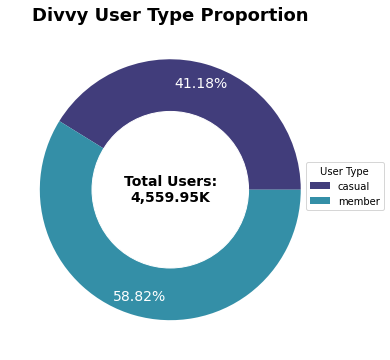

In [53]:
fig, ax = plt.subplots(figsize = (15,6))

# Pie chart
plt.pie(user_proportion.proportion,
        autopct='%1.2f%%',
        pctdistance=0.85,
        colors =['#413d7b','#348fa7'],
        textprops={'fontsize':14,'color':'w'})

# Drawing circle to create a donnut chart
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()

# Adding circle in Pie chart
p.gca().add_artist(my_circle)

# Adding title
plt.title('Divvy User Type Proportion',
        fontdict={'fontweight':'bold','fontsize':18})

# Adding text in the middle
ax.text(0., 0.,'Total Users:\n{:,.2f}K'.format(user_proportion['count'].sum()/1000), 
        horizontalalignment='center',
        verticalalignment='center',
        fontdict={'fontweight':'bold','fontsize':14})
        
# Adding legend        
plt.legend(['casual','member'],title='User Type', bbox_to_anchor=(0.9, 0.6))
fig.set_facecolor('w')

# Display plot
plt.show()


Here we can see the total number of user and the proportion of casual and member users accordingly.

## Average Ride Length by User Type

In [ ]:
# what is the average ride length for members and casual riders?
av_ride_length_by_user = clean_df.groupby('member_casual',as_index = False)['ride_length'].mean()\
  .rename(columns={'ride_length':'average_ride_length'})
av_ride_length_by_user

,member_casual,average_ride_length
0,casual,0 days 00:25:47.407986874
1,member,0 days 00:12:32.795466747


The average ride length for casual users is 25 minutes.

The average ride length for member users is 12 minutes.

**Visualizing our findings**:

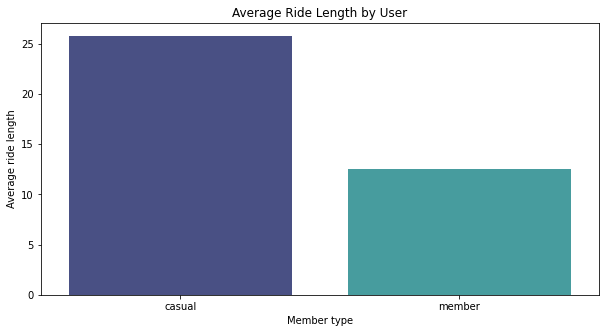

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = av_ride_length_by_user.member_casual, 
            y = av_ride_length_by_user.average_ride_length.dt.total_seconds()/60,
            ax =ax,
            palette='mako')\
  .set(title='Average Ride Length by User', xlabel = 'Member type',
       ylabel = 'Average ride length')

# Display plot
plt.show()

On average, casual users have loger ride trips in comparison with member users.

## Average Ride Length per User Type by Day of the Week

Now that we know that casual users on average have longer rides, let's find out the average ride length by day of the week for each group of users.

In [ ]:
# Average ride_length for users by day_of_week
av_ride_length_by_user_and_day = clean_df.groupby(['member_casual','day_of_week_name'],as_index = False)['ride_length'].mean()\
  .rename(columns ={'ride_length':'average_ride_length'})

# Sorting the output by the sorter list.
sorter = ['casual','member','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
av_ride_length_by_user_and_day.sort_values(by=["member_casual","day_of_week_name"], 
                                           key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)
av_ride_length_by_user_and_day

,member_casual,day_of_week_name,average_ride_length
1,casual,Monday,0 days 00:26:46.657052644
5,casual,Tuesday,0 days 00:22:34.463801400
6,casual,Wednesday,0 days 00:22:04.992217324
4,casual,Thursday,0 days 00:22:46.477447873
0,casual,Friday,0 days 00:24:01.843746002
2,casual,Saturday,0 days 00:28:23.375437451
3,casual,Sunday,0 days 00:29:43.455147975
8,member,Monday,0 days 00:12:09.608896100
12,member,Tuesday,0 days 00:11:48.799135117
13,member,Wednesday,0 days 00:11:55.219022446


**Visualizing our findings**:

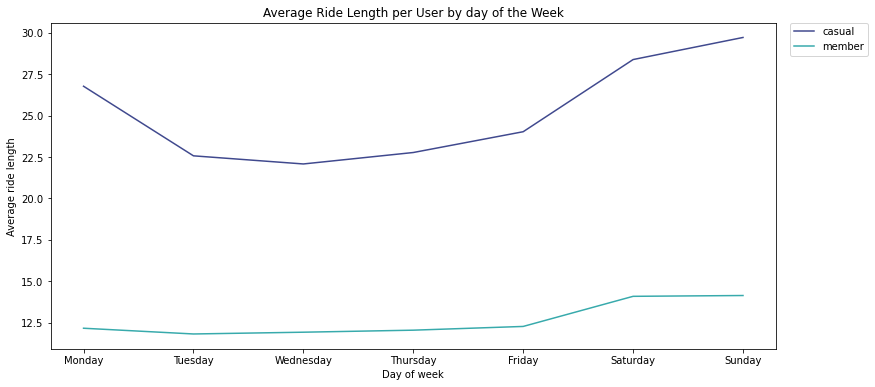

In [68]:
fig, ax = plt.subplots(figsize=(13, 6))

sns.lineplot(x = "day_of_week_name",y = av_ride_length_by_user_and_day.average_ride_length.dt.total_seconds()/60,
            data =av_ride_length_by_user_and_day, 
            hue = "member_casual",ax=ax,
            palette = "mako")\
            .set(xlabel="Day of week", ylabel = "Average ride length")

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Average Ride Length per User by day of the Week")

# Display plot
plt.show()

The graph above shows that users tend to have longer rides on weekends, especially casual users.

## Number of Rides per User by Day of the Week

Now, let's check for the count of daily rides for each of the membership categories.

In [4]:
# Number of rides for users by day_of_week
number_user_rides_by_day=clean_df.groupby(['member_casual','day_of_week_name'],
                                    as_index = False)['ride_id'].count()\
  .rename(columns ={'ride_id':'number_of_rides'})

# Sorting the output by the sorter list.
sorter = ['casual','member','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
number_user_rides_by_day.sort_values(by=["member_casual","day_of_week_name"], 
                                           key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)
number_user_rides_by_day

,member_casual,day_of_week_name,number_of_rides
1,casual,Monday,221066
5,casual,Tuesday,205519
6,casual,Wednesday,216892
4,casual,Thursday,230976
0,casual,Friday,257971
2,casual,Saturday,401473
3,casual,Sunday,344009
8,member,Monday,376547
12,member,Tuesday,426879
13,member,Wednesday,434718


**Visualizing our findings**:

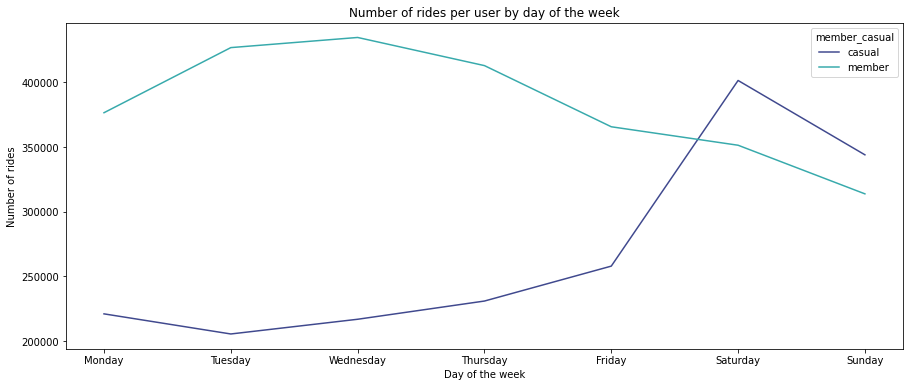

In [77]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = 'day_of_week_name',
             y = 'number_of_rides',
             data = number_user_rides_by_day,
             hue ='member_casual',ax=ax,
             palette = 'mako')\
             .set(title='Number of rides per user by day of the week',
                  xlabel = 'Day of the week',
                  ylabel = 'Number of rides')
# Display plot
plt.show()

We can see clearly that casual users ride more often on weekends and member users on weekdays.

## Number of Rides per User by Hour

Let's see what is the most busy hour of the day for each of the membership categories.

In [80]:
# Number of rides for users by Hour
number_user_rides_by_hour=clean_df.groupby(['member_casual','hour_of_day'],
                                    as_index = False)['ride_id'].count()\
  .rename(columns ={'ride_id':'number_of_rides'})

# Sorting the output by the sorter list.
number_user_rides_by_hour.sort_values(by=["member_casual","hour_of_day"])

# Display first 5 rows
number_user_rides_by_hour.head()

,member_casual,hour_of_day,number_of_rides
0,casual,0,35794
1,casual,1,23412
2,casual,2,14243
3,casual,3,7957
4,casual,4,5343


For us to be able to see this information in a more useful way, let's see the graph below.

**Visualizing our findings**:

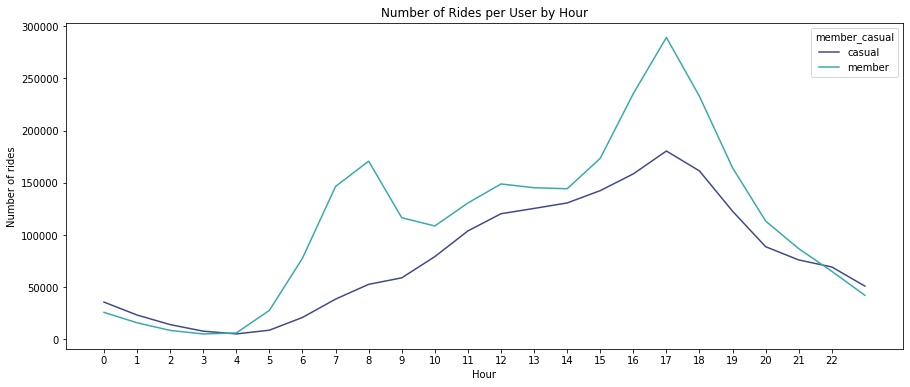

In [92]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = 'hour_of_day',
             y = 'number_of_rides',
             data = number_user_rides_by_hour,
             hue ='member_casual',ax=ax,
             palette = 'mako')\
             .set(title='Number of Rides per User by Hour',
                  xlabel = 'Hour',
                  ylabel = 'Number of rides')

ax.set_xticks(np.arange(min(number_user_rides_by_hour.hour_of_day),
               max(number_user_rides_by_hour.hour_of_day),1))
# Display plot               
plt.show()

Now we can see clearly that the busiest hour is around 5:00 PM. Also, we can notice that in the case of member users, there's a pick between 7:00 AM and 8:00 AM, when people usually go to work.

## Distribution of Rides by Hour

Now that we know what is the busiest hour of the day, it will be interesting to see the distribution of rides by hour.

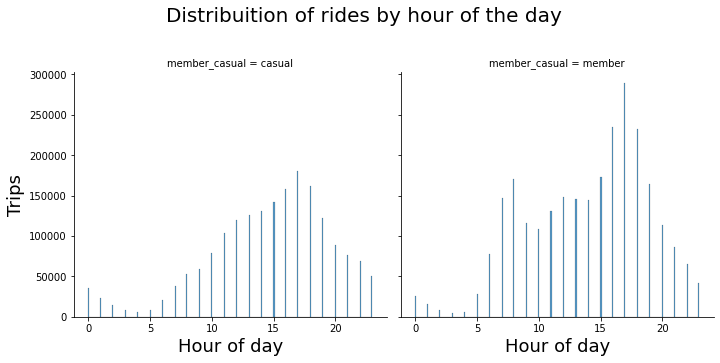

In [93]:
# Distribution of rides by hour.
g =sns.displot(clean_df, 
               x="hour_of_day", 
               col="member_casual")

# Setting title
g.figure.subplots_adjust(top=0.8)
g.fig.suptitle('Distribuition of rides by hour of the day',fontsize=20,
    fontdict={'weight': 'bold'}) 

# Setting X labels
g.set_xlabels('Hour of day',fontsize = 18)

# Setting Y labels
g.set_ylabels('Trips', fontsize = 18)

# Display plot
plt.show()

This is an insteresting finding. Here we can see that there are two group of people for each member category, one between 12:00 A.M. and 4:00 A.M. and the other between 5:00 A.M and 23:00 P.M

## Number of Trips by Month

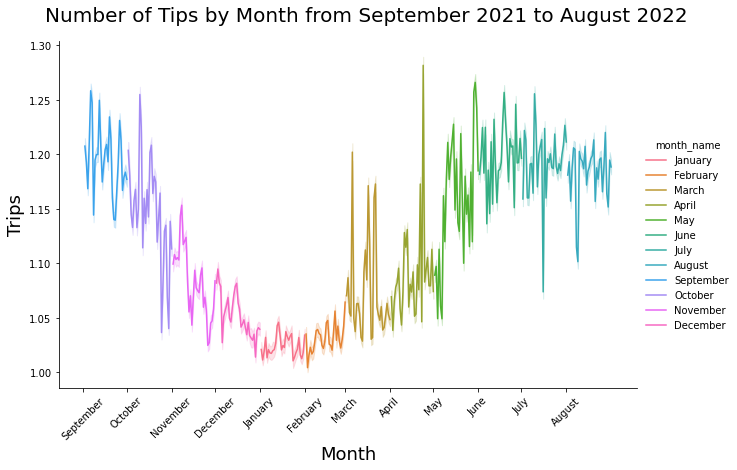

In [95]:
# Grouping by month_name and started_at date and getting number of trips
user_rides_per_month = clean_df.groupby(['month_name','started_at'])\
  .size().reset_index(name = 'counts')

# Creating plot
g = sns.relplot(x = user_rides_per_month.started_at.dt.date,
            y = 'counts',
            data = user_rides_per_month,
            hue= 'month_name',
            kind ='line',
            height=6,
            aspect=1.5,
            hue_order=['January','February','March','April','May','June','July','August','September','October','November','December'])

# Changing the number of Xticks displayed
g.set(xticks=pd.date_range(start = '8/1/2021', periods = 12, freq = 'M'))

g.figure.subplots_adjust(top=0.9)

# Setting the tittle
g.figure.suptitle(
    'Number of Tips by Month from September 2021 to August 2022',
    fontsize=20,
    fontdict={"weight": "bold"}
)
# Setting X labels
g.set_xlabels('Month',fontsize = 18)

# Setting Y labels
g.set_ylabels('Trips', fontsize = 18)

# Changing Xticks labels to month names
g.set_xticklabels(['September','October','November','December','January','February','March','April','May','June','July','August'],
                  rotation = 45)
# Display plot                  
plt.show()

The months where are fewer rides are December, January, February, and March which is the winter season.

## Number of Trips by Month per User Type 

It's time to see how many trips each user category have done in the last year by month.

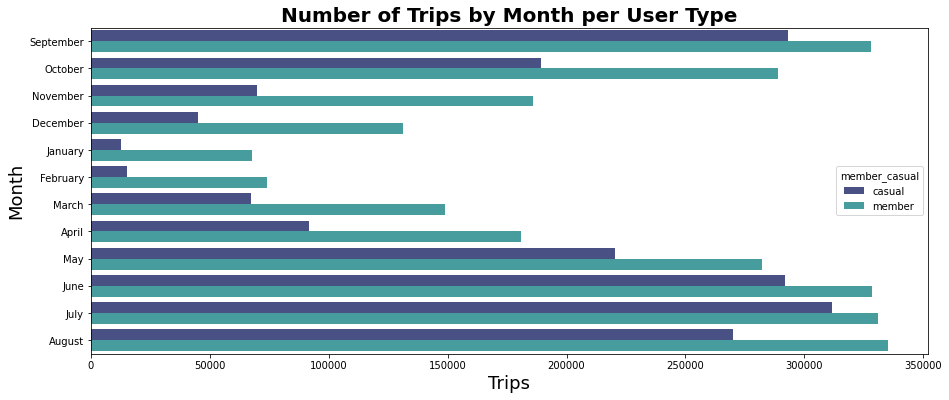

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
sns.countplot(y = 'month_name',
              data = clean_df,
              hue = 'member_casual',
              palette = 'mako', 
              ax = ax)

ax.set_title('Number of Trips by Month per User Type',fontdict = {'fontweight':'bold','fontsize':20})
ax.set_ylabel('Month',fontsize = 18)
ax.set_xlabel('Trips', fontsize =18)

# Display plot
plt.show()

In general, member users have more trips every month, this is because they use our bikes more often on weekdays, in comparison with casual users that tend to use our bikes more often on weekends. In the same sense, the months in which casual users use our bikes the least are January and February (Winter season).

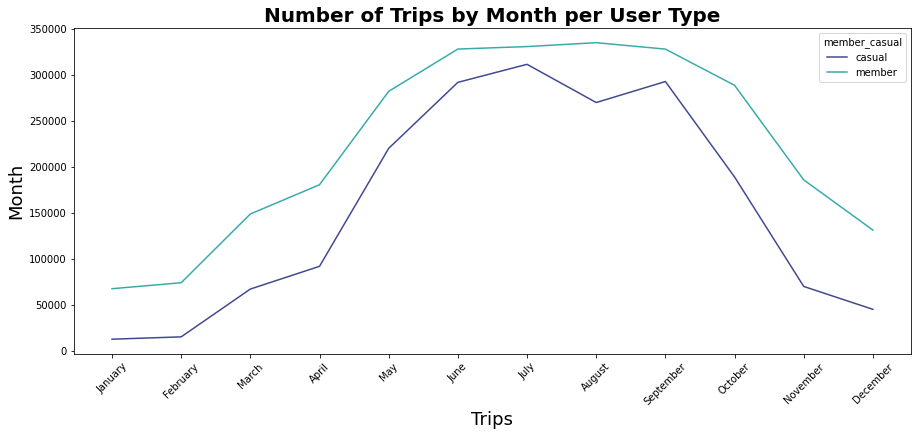

In [119]:
# Number of trips by month per user type Line chart
fig, ax = plt.subplots(figsize = (15,6))
g = sns.lineplot(x = 'month',
            y = 'number_of_rides',
              data = clean_df.groupby(['member_casual','month'],
                                    as_index = False)['ride_id'].count()\
                                    .rename(columns ={'ride_id':'number_of_rides'}),
              hue = 'member_casual',
              palette = 'mako', 
              ax = ax)

ax.set_title('Number of Trips by Month per User Type',fontdict = {'fontweight':'bold','fontsize':20})
ax.set_ylabel('Month',fontsize = 18)
ax.set_xlabel('Trips', fontsize =18)

# Getting all ticks for the 12 months
ax.set_xticks(np.arange(min(clean_df.month),
               max(clean_df.month)+1,1))
               
# Changing ticks labels
g.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'],
                  rotation = 45)

# Display plot
plt.show()

From this graph we can see more clearly that the busiest months are June and July.

### Distribution of rides by month


Let's see its distribution by month.

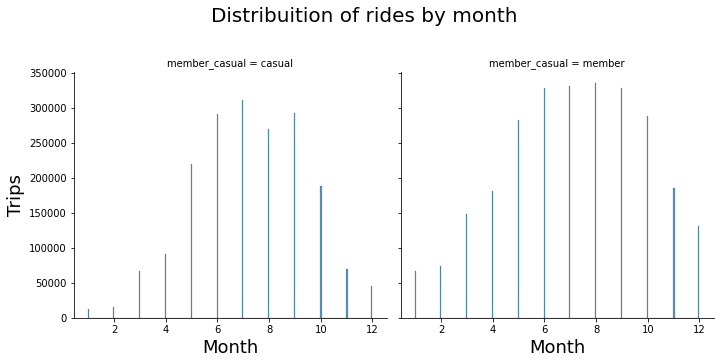

In [94]:
# Distplot for rides by month per user type
g =sns.displot(clean_df, 
               x="month", 
               col="member_casual")
# Setting title
g.figure.subplots_adjust(top=0.8)
g.fig.suptitle('Distribuition of rides by month',fontsize=20,
    fontdict={'weight': 'bold'}) 

# Setting X labels
g.set_xlabels('Month',fontsize = 18)

# Setting Y labels
g.set_ylabels('Trips', fontsize = 18)

# Display plot
plt.show()

The number of rides, in general, is normally distributed across the months for each user category.

## Type of Bike used by User Type

Now that we know the busiest months, days, and hours where each user type tends to ride more often, it's time to find out what is the most common type of bike they use.

In [ ]:
# Bike used by user type
user_rides_by_bike_type = clean_df.groupby(['member_casual','rideable_type'])\
  .size().reset_index(name = 'counts')

user_rides_by_bike_type

,member_casual,rideable_type,counts
0,casual,classic_bike,1027978
1,casual,docked_bike,205771
2,casual,electric_bike,644157
3,member,classic_bike,1862737
4,member,docked_bike,0
5,member,electric_bike,819311


From this table, we can see that the Classic Bike is preferred for both types of users, followed by the Electric Bike.

A curious observation is that member users haven't used Docked Bikes in the last year of data available. 

**Visualizing our findings**:

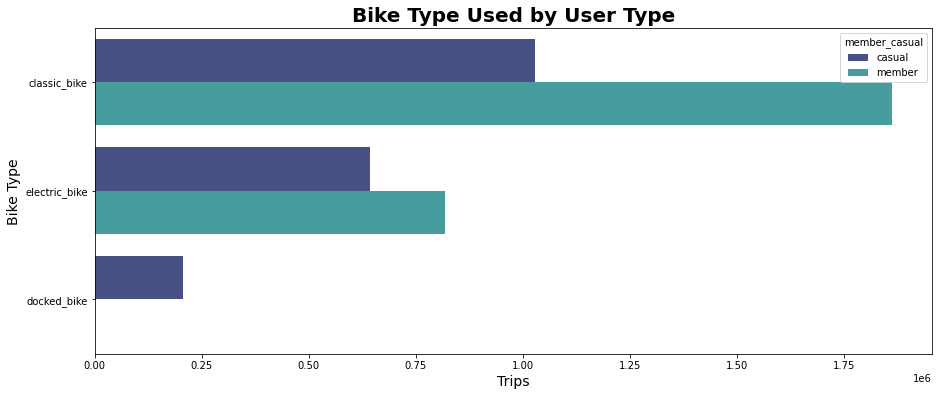

In [122]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(y = 'rideable_type', data = clean_df,
              hue = 'member_casual',palette = 'mako',ax = ax)

# Setting the Title
ax.set_title('Bike Type Used by User Type', fontdict={'fontweight':'bold','fontsize':20})

# Setting the Ylabel
ax.set_ylabel('Bike Type', fontsize = 14)

# Setting the Xlabe;
ax.set_xlabel('Trips', fontsize = 14)

# Display plot
plt.show()

This is an easiest way to interpret the data. 

### Correlation between Month and Ride Length

Let's take a look to see if there is some sort of relationship between the Month of the year and the Ride Length. This information could be useful to create some kind of campaign.

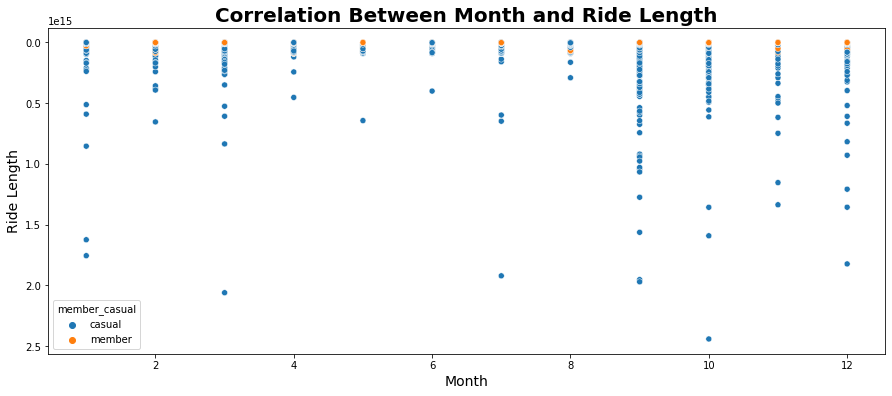

In [126]:
# relationship between month and ride length
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x = 'month',y ='ride_length', data = clean_df,hue ='member_casual')

# Setting the Title
ax.set_title('Correlation Between Month and Ride Length', fontdict={'fontweight':'bold','fontsize':20})

# Setting the Ylabel
ax.set_ylabel('Ride Length', fontsize = 14)

# Setting the Xlabe;
ax.set_xlabel('Month', fontsize = 14)

# Display plot
plt.show()

There is no linear relationship between the month of the year and the ride length by the user. So we cannot say that one affects the other.

## Top 30 Departure and Arrival Stations For Casual Riders

Let's find out which are the most common start and end stationshow and how many are round trips for **casual users**:

In [7]:
# Filtering DataFrame for member type = Casual and creating new DataFrame
casual = clean_df.loc[clean_df.member_casual == 'casual']

# Creating a new column with the start station name and end station name joined together
casual['station'] = casual.start_station_name+"-"+casual.end_station_name 

# Creating a new column to store if the start and end station names are the same
casual['same_start_and_end_station'] = ['Yes' if casual.start_station_name[x] == casual.end_station_name[x] else 'No' for x in casual.index]

# Group by station and same_start_and_end_station
group_casual = casual.groupby(['station','same_start_and_end_station'])\
    .size().reset_index(name = 'counts')\
    .sort_values(by = 'counts',ascending = False)[:30] # Here we sort the values in descending order and filter only the top 30.

# Printing first 5 observations
group_casual.head(5)

,station,same_start_and_end_station,counts
117642,Streeter Dr & Grand Ave-Streeter Dr & Grand Ave,Yes,10895
44074,Dusable Lake Shore Dr & Monroe St-Dusable Lake...,Yes,6610
44301,Dusable Lake Shore Dr & Monroe St-Streeter Dr ...,No,5356
81988,Michigan Ave & Oak St-Michigan Ave & Oak St,Yes,4852
83856,Millennium Park-Millennium Park,Yes,4423


**Number of trips by category:**

**Yes** = the trip started and ended at the same station

**No** =  the trip started and ended at different stations

In [38]:
print(casual.same_start_and_end_station.value_counts().reset_index(name= 'count'))

  index    count
0    No  1690741
1   Yes   187165


### General proportion of round trips:

In [34]:
# Percentage of round trips overall for casual users
print(f'{round((casual.same_start_and_end_station.value_counts()[1]/(casual.same_start_and_end_station.value_counts().sum()))*100,2)}%')

9.97%


### Proportion of round trips for the top 30 most common departure and arrival stations:

In [30]:
# Percentage of round trip for casual members

print(f'{round((group_casual.same_start_and_end_station.value_counts()[1]/(group_casual.same_start_and_end_station.value_counts().sum()))*100,2)}%')

46.67%


The 46.67% of trips across the 30 most common stations start and end at the same station. Therefore, 53.33% start and end at different stations.

**Visualizing our findings:**

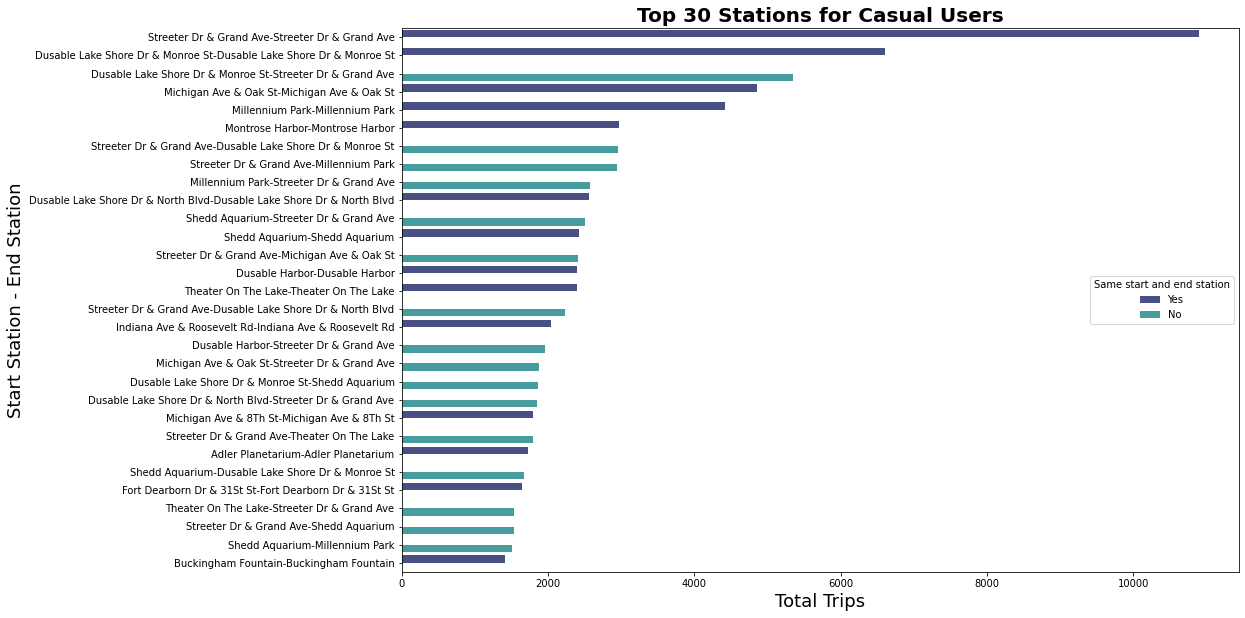

In [35]:
# Creating Bar Chart
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x= 'counts',
            y = 'station',
            data = group_casual,
            hue = 'same_start_and_end_station',
            palette='mako',
            ax = ax)
# Setting the tittle          
ax.set_title('Top 30 Stations for Casual Users',fontdict = {'fontweight':'bold','fontsize':20})

# Setting the Xlabel
ax.set_xlabel('Total Trips', fontsize = 18)

# Setting the Ylabel
ax.set_ylabel('Start Station - End Station',fontsize = 18)

# Adjusting legend
plt.legend(loc = 'center right',title='Same start and end station')

# Display plot
plt.show()

Here we can see clearly that approximately 47% of the time Casual users start and end their trips at the same station. This might be an explanation for why their ride lengths are more extended than Member users.

## Top 30 Departure and Arrival Stations For Member Riders

Let's find out which are the most common start and end stationshow and how many are round trips for **member users**:

In [22]:
# Filtering DataFrame for member type = Member and creating new DataFrame
member = clean_df.loc[clean_df.member_casual == 'member']

# Creating a new column with the start station name and end station name joined together
member['station'] = member.start_station_name+"-"+member.end_station_name 

# Creating a new column to store if the start and end station names are the same
member['same_start_and_end_station'] = ['Yes' if member.start_station_name[x] == member.end_station_name[x] else 'No' for x in member.index]

# Group by station and same_start_and_end_station
group_member = member.groupby(['station','same_start_and_end_station'])\
    .size().reset_index(name = 'counts')\
    .sort_values(by = 'counts',ascending = False)[:30] # Here we sort the values in descending order and filter only the top 30.

# Printing first 5 observations
group_member.head(5)

,station,same_start_and_end_station,counts
47872,Ellis Ave & 60Th St-University Ave & 57Th St,No,5681
121808,University Ave & 57Th St-Ellis Ave & 60Th St,No,5515
47811,Ellis Ave & 60Th St-Ellis Ave & 55Th St,No,5352
47608,Ellis Ave & 55Th St-Ellis Ave & 60Th St,No,4710
16469,Calumet Ave & 33Rd St-State St & 33Rd St,No,2642


**Number of trips by category:**

**Yes** = the trip started and ended at the same station

**No** =  the trip started and ended at different stations

In [39]:
print(member.same_start_and_end_station.value_counts().reset_index(name= 'count'))

  index    count
0    No  2564971
1   Yes   117077


### General proportion of round trips:

In [43]:
# Percentage of round trips overall for member users
print(f'{round((member.same_start_and_end_station.value_counts()[1]/(member.same_start_and_end_station.value_counts().sum()))*100,2)}%')

4.37%


The 4.67% of trips across the 30 most common stations start and end at the same station. Therefore, 95.63% start and end at different stations.

### Proportion of round trips for the top 30 most common departure and arrival stations:

In [42]:
# Percentage of round trip for casual members
print(f'{round((group_member.same_start_and_end_station.value_counts()[1]/(group_member.same_start_and_end_station.value_counts().sum()))*100,2)}%')

6.67%


The 6.67% of trips across the 30 most common stations start and end at the same station. Therefore, 93.33% start and end at different stations.

**Visualizing our findings:**

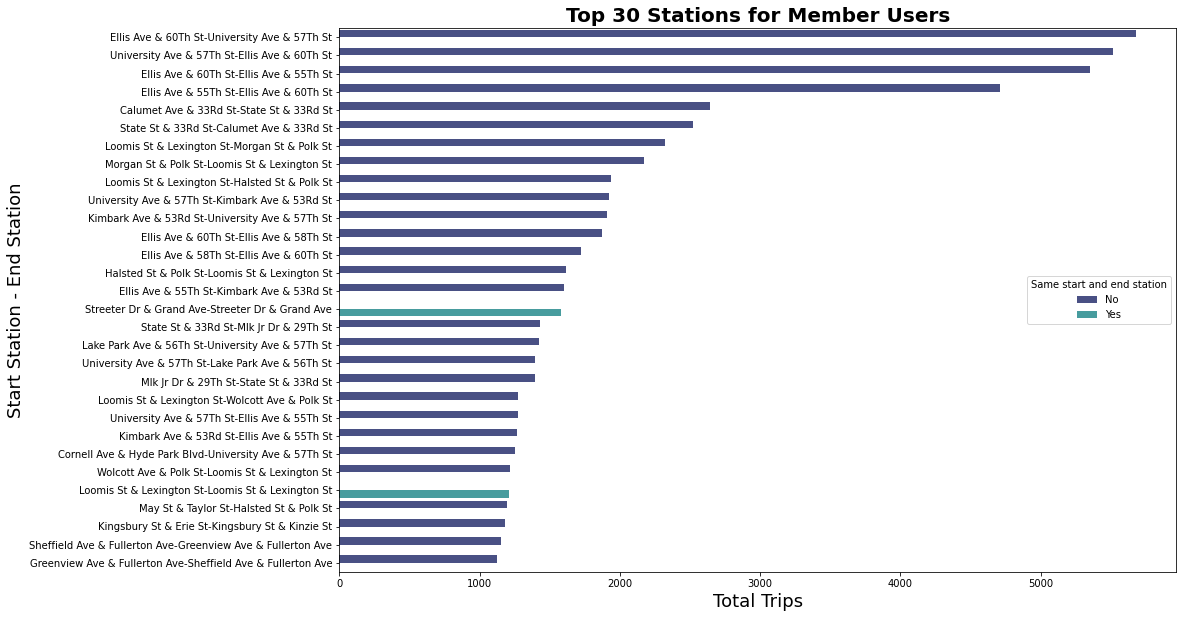

In [36]:
# Creating Bar Chart
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x= 'counts',
            y = 'station',
            data = group_member,
            hue = 'same_start_and_end_station',
            palette='mako',
            ax = ax)

# Setting the title
ax.set_title('Top 30 Stations for Member Users',fontdict = {'fontweight':'bold','fontsize':20})

# Setting Xlabel
ax.set_xlabel('Total Trips', fontsize = 18)

# Setting Ylabel
ax.set_ylabel('Start Station - End Station',fontsize = 18)

# Adjusting legend
plt.legend(loc = 'center right',title='Same start and end station')

# Display plot
plt.show()

Here we can see clearly that approximately 93% of the time Casual users start and end their trips at different stations. We can conclude from this that Member users mainly use our bikes to commute to work, this assumption can be explained because we know that the most common days for member users are on weekdays.

Approximately 93% of member users' trips start and end at different stations. This probably is because Member users mainly use the bikes on weekdays, posibily to commute to work.

# Conclusions

### Insights

* 58.82% of users are Member users
* Casual users use the services mainly on weekends.
* Member users use the services mainly on weekdays. 
* Casual users' ride length is longer than Member users' type. This is probably because casual users start and end their trips at the same station.
* On average both user types have longer trips on weekends.
* The most common bike among both user types is the Classic bike, followed by the Electric bike.
* The preferred time for a ride is between May and September.

# Recommendations

Since Casual users are a substantial proportion of users that uses our services,41.18%, we should consider the following recommendations:

- Create a promotion where casual rides can subscribe for unlimited rides on weekends.
- Create a promotional strategy to target Casual users that use our bikes to commute to work
- As Casual users tend to have longer ride lengths, we should aim to show Casual users the benefits of annual memberships.

In [ ]:
def solution(src, dest):
    #Your code here
    if src == dest:
        return 0

    def coordinate(src):
        return src /8 , src %8
        
    def board(sx, sy, b):
        arr = [(sx, sy)]
        while arr:
            x, y = arr.pop()
            for i in [[1,2],[-1,2],[1,-2],[-1,-2],[2,1],[-2,1],[2,-1],[-2,-1]]:
             nx, ny = x + i[0], y + i[1]
            if 0 <= nx <= 7 and 0 <= ny <= 7:
                if b[nx][ny] is None:
                    b[nx][ny] = b[x][y] + 1
                    arr.append((nx, ny)) 

    def sol(src, dest):
        b = [[None for i in range(8)] for i in range(8)]
        sx, sy =  coordinate(src)
        dx, dy =  coordinate(dest)
        b[sx][sy] = 0
        board(sx, sy, b)
        return b[dx][dy]

    return sol(src,dest)

solution(3,5)


In [17]:
def cord(src):
    return src / 8, src % 8

def sht_pth(sx, sy, board):
    arr = [(sx, sy)]
    while arr:
        x, y = arr.pop(0)
        for i in [[1,2],[-1,2],[1,-2],[-1,-2],[2,1],[-2,1],[2,-1],[-2,-1]]:
          nx, ny = x + i[0], y + i[1]
          if 0 <= nx <= 7 and 0 <= ny <= 7:
              if board[nx][ny] is None:
                  board[nx][ny] = board[x][y] + 1
                  arr.append((nx, ny)) 

def answer(src, dest):
    board = [[None for i in range(8)] for i in range(8)]
    sx, sy = cord(src)
    dx, dy = cord(dest)
    board[sx][sy] = 0
    sht_pth(sx, sy, board)
    return board[dx][dy]

#print answer(19, 36)
# Answer 1

print(answer(0, 1))
# Answer 3

TypeError: list indices must be integers or slices, not float